In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_nam14_UNAVCO,convert_trend_toyearly

%matplotlib inline

In [2]:
datum = '????'
ext = '.csv'
meth = '.cwu.nam14'
dir_in = 'data/GPS'


In [3]:
pattern = os.path.join(dir_in, datum + meth + ext)
print(pattern)

data/GPS\????.cwu.nam14.csv


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\ASKY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-20   0.00  0.00      0.00      2.00     1.53         9.87   repro
2007-08-21   1.82 -0.63     -2.30      2.02     1.53         9.82   repro
2007-08-22  -0.98  0.33     -3.36      2.01     1.54         9.82   repro
2007-08-23  -0.35 -1.54     -4.23      1.97     1.51         9.60   repro
2007-08-24  -0.76 -1.11     -1.18      2.05     1.57        10.15   repro


data/GPS\BLAS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-07-08   0.00  0.00      0.00      1.91     1.59        10.91   repro
2008-07-09   0.30  0.73     -8.95      1.93     1.59        11.11   repro
2008-07-10   1.84 -0.15    -13.82      2.03     1.70        11.66   repro
2008-07-11  -0.48  0.64    -16.57      1.99     1.60

2008-07-20   1.59 -0.05      3.32      1.73     1.54        12.08   repro


data/GPS\KMOR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-09-04   0.00  0.00      0.00      1.80     1.49        11.49   repro
2007-09-05  -1.29 -0.19     -4.03      1.82     1.52        11.63   repro
2007-09-06  -0.96  0.26    -16.53      1.82     1.52        11.67   repro
2007-09-07  -0.41 -0.84     -2.51      1.86     1.56        12.00   repro
2007-09-08  -0.16 -0.19     -2.73      1.89     1.53        11.94   repro


data/GPS\KSNB.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-21   0.00  0.00      0.00      2.33     1.64         8.63   repro
2007-08-22  -3.50 -1.07      9.86      2.25     1.59         8.34   repro
2007-08-23  -3.78 -2.42      5.54      2.33     1.61



data/GPS\SRMP.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-14   0.00  0.00      0.00      2.22     1.63         9.88   repro
2007-08-15  -2.86  0.14     -1.82      2.27     1.67        10.17   repro
2007-08-16  -0.61 -1.14     -0.60      2.26     1.62         9.87   repro
2007-08-17  -1.13 -0.73      5.55      2.19     1.59         9.37   repro
2007-08-18  -0.34 -0.11      4.34      2.14     1.56         9.42   repro


data/GPS\TIMM.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-20   0.00  0.00      0.00      2.32     1.57         7.66   repro
2007-08-21   2.70 -0.92     -4.98      2.33     1.57         7.72   repro
2007-08-22   0.10 -1.06      0.97      2.32     1.58         7.77   repro
2007-08-23   0.15 -2.00      2.32      2.27     1.54

In [6]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, site, var, trend_array):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {trend_array * 1:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    

In [7]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend



data/GPS\ASKY.cwu.nam14.csv
f: 0
Trend = 19.67 mm/yr


data/GPS\BLAS.cwu.nam14.csv
f: 1
Trend = 7.85 mm/yr


data/GPS\DGJG.cwu.nam14.csv
f: 2
Trend = 3.69 mm/yr


data/GPS\DKSG.cwu.nam14.csv
f: 3
Trend = 18.71 mm/yr


data/GPS\GMMA.cwu.nam14.csv
f: 4
Trend = 6.17 mm/yr


data/GPS\GROK.cwu.nam14.csv
f: 5
Trend = 7.50 mm/yr


data/GPS\HEL2.cwu.nam14.csv
f: 6
Trend = 16.49 mm/yr


data/GPS\HJOR.cwu.nam14.csv
f: 7
Trend = 5.73 mm/yr


data/GPS\HMBG.cwu.nam14.csv
f: 8
Trend = 1.20 mm/yr


data/GPS\HRDG.cwu.nam14.csv
f: 9
Trend = 7.67 mm/yr


data/GPS\JGBL.cwu.nam14.csv
f: 10
Trend = 6.08 mm/yr


data/GPS\JWLF.cwu.nam14.csv
f: 11
Trend = 6.85 mm/yr


data/GPS\KAGA.cwu.nam14.csv
f: 12
Trend = 18.29 mm/yr


data/GPS\KAGZ.cwu.nam14.csv
f: 13
Trend = 9.59 mm/yr


data/GPS\KBUG.cwu.nam14.csv
f: 14
Trend = 7.90 mm/yr


data/GPS\KMJP.cwu.nam14.csv
f: 15
Trend = 4.71 mm/yr


data/GPS\KMOR.cwu.nam14.csv
f: 16
Trend = 7.29 mm/yr


data/GPS\KSNB.cwu.nam14.csv
f: 17
Trend = 12.86 mm/yr


data/GPS\KUAQ

C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LBIB.cwu.nam14.csv
f: 21
Trend = 1.97 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LEFN.cwu.nam14.csv
f: 22
Trend = 6.07 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LYNS.cwu.nam14.csv
f: 23
Trend = 7.39 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MARG.cwu.nam14.csv
f: 24
Trend = 8.26 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MIK2.cwu.nam14.csv
f: 25
Trend = 12.78 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MSVG.cwu.nam14.csv
f: 26
Trend = 3.20 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\NNVN.cwu.nam14.csv
f: 27
Trend = 5.58 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\NRSK.cwu.nam14.csv
f: 28
Trend = 5.87 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\PLPK.cwu.nam14.csv
f: 29
Trend = 11.42 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\QAAR.cwu.nam14.csv
f: 30
Trend = 8.63 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\RINK.cwu.nam14.csv
f: 31
Trend = 9.23 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SCBY.cwu.nam14.csv
f: 32
Trend = 10.59 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SENU.cwu.nam14.csv
f: 33
Trend = 9.23 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SRMP.cwu.nam14.csv
f: 34
Trend = 15.55 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\TIMM.cwu.nam14.csv
f: 35
Trend = 9.04 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\TREO.cwu.nam14.csv
f: 36
Trend = 7.16 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\UTMG.cwu.nam14.csv
f: 37
Trend = 7.69 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\VFDG.cwu.nam14.csv
f: 38
Trend = 4.86 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\WTHG.cwu.nam14.csv
f: 39
Trend = 2.48 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\YMER.cwu.nam14.csv
f: 40
Trend = 2.41 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


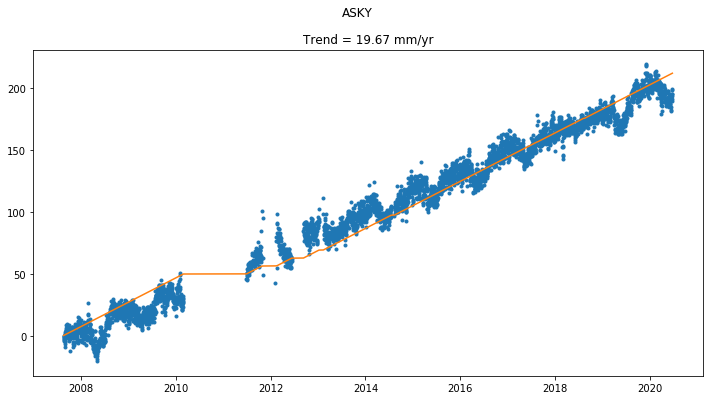

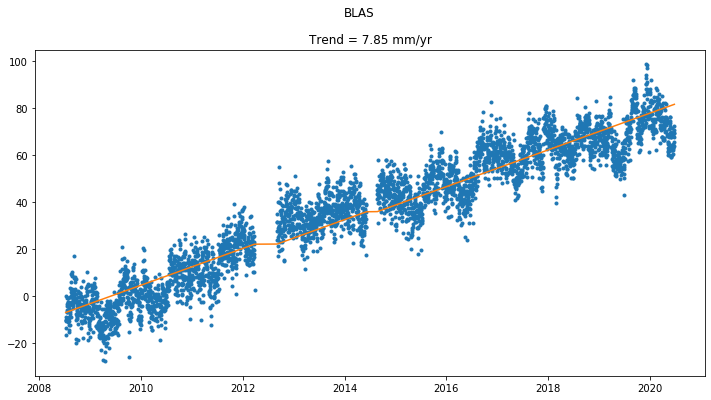

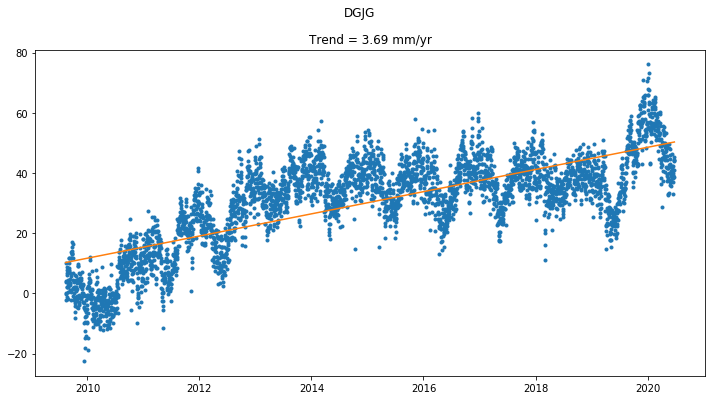

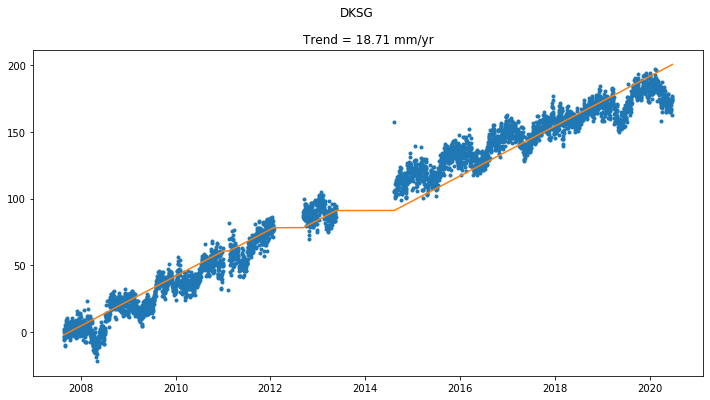

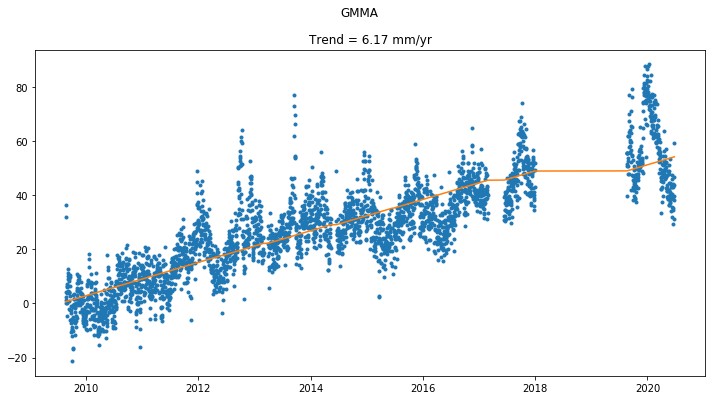

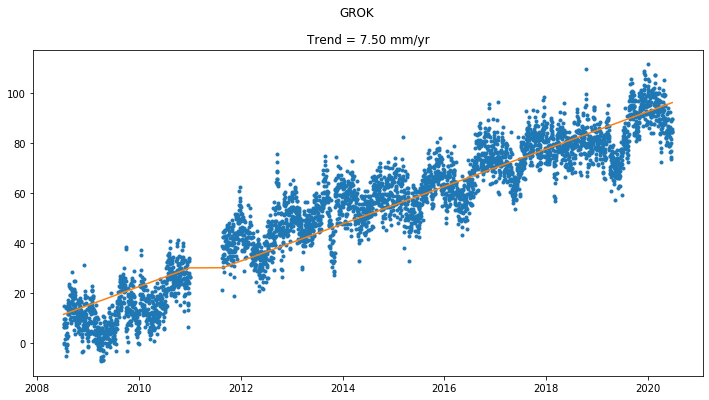

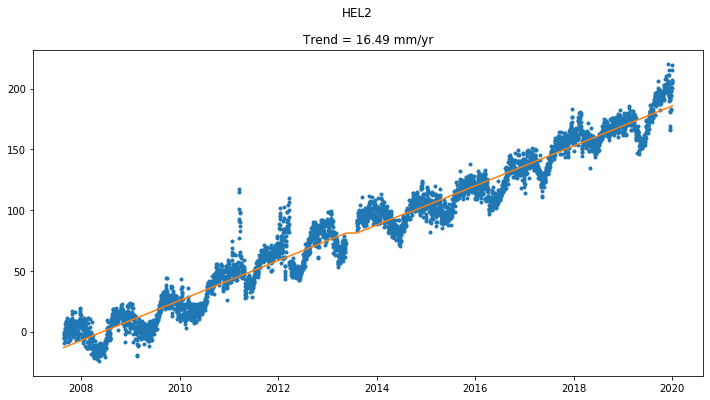

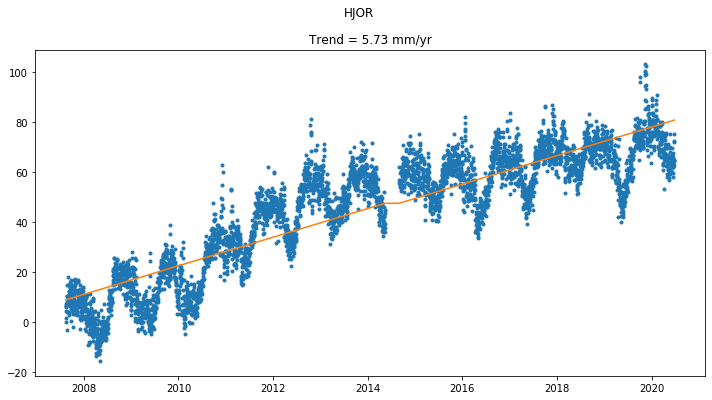

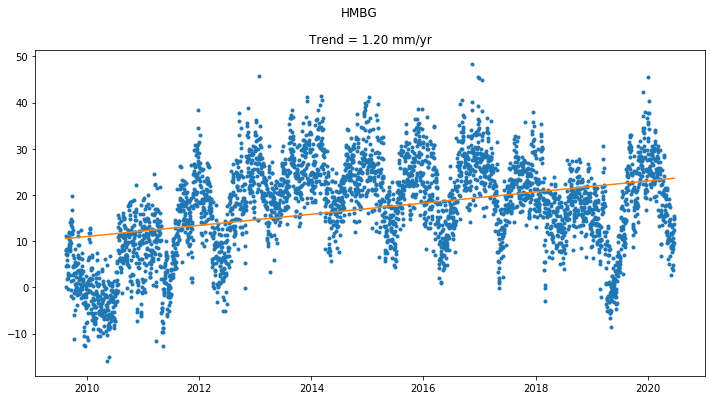

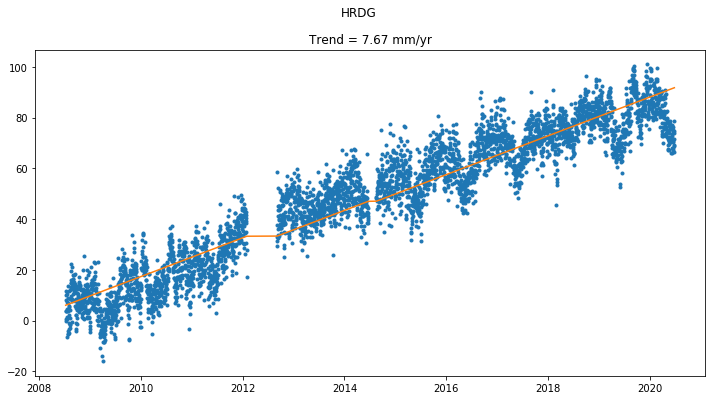

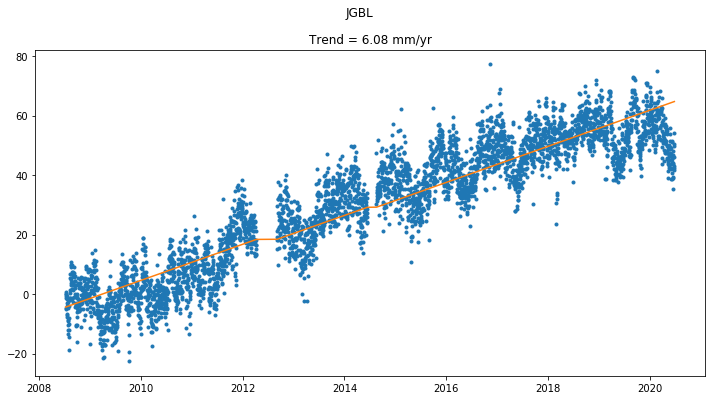

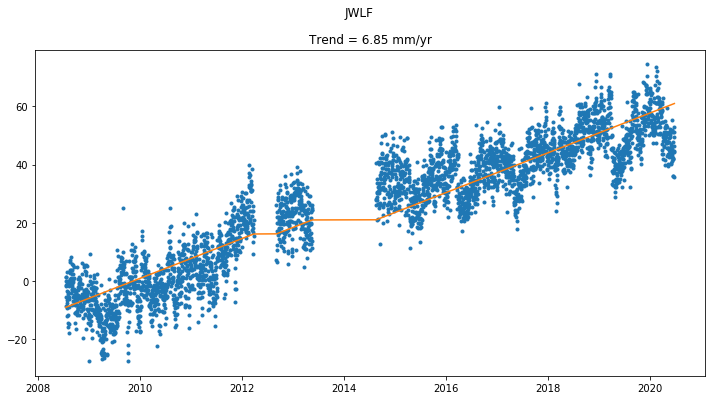

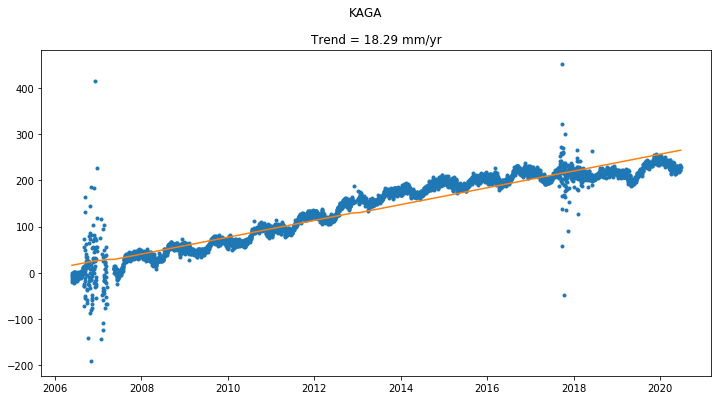

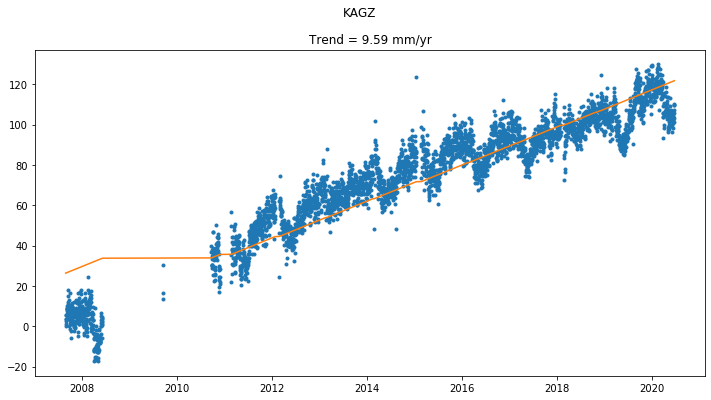

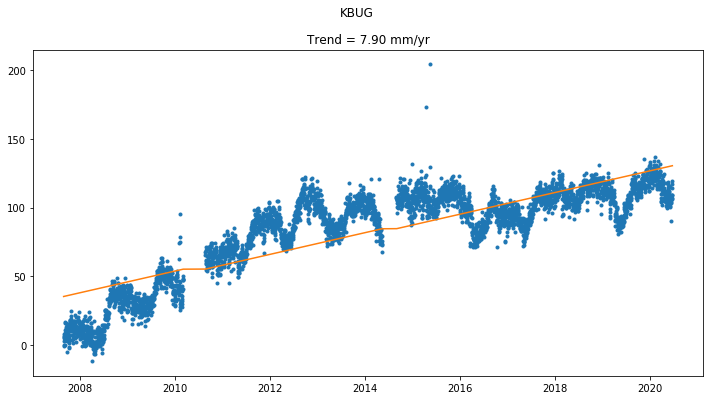

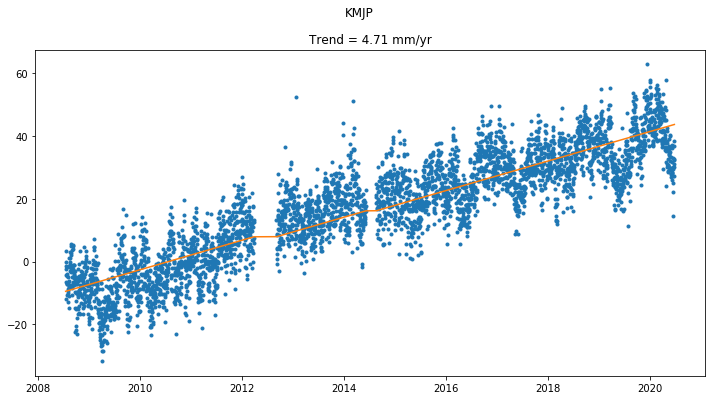

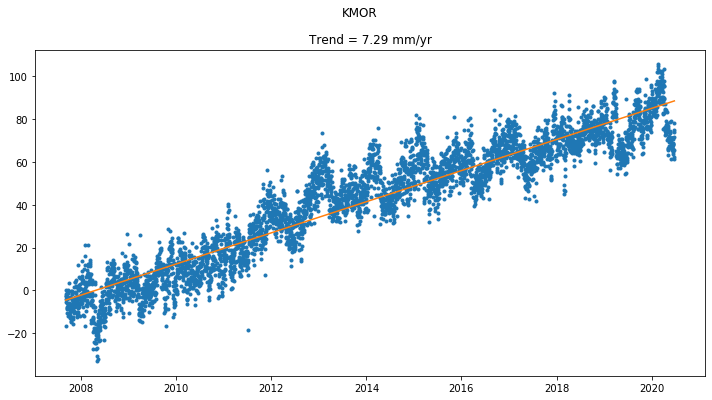

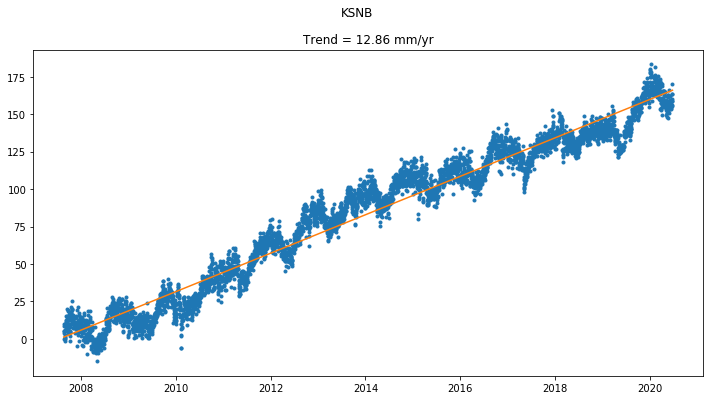

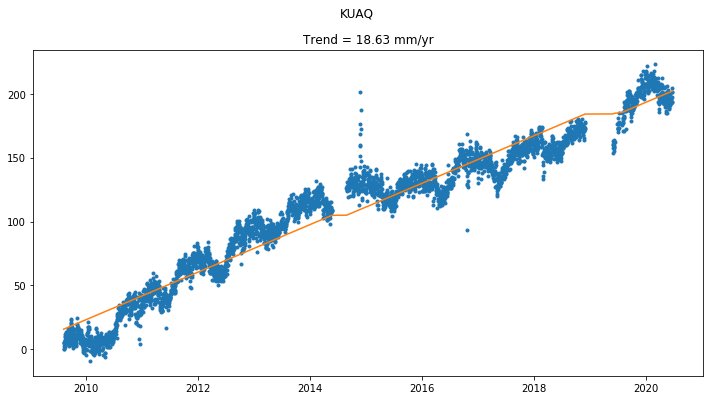

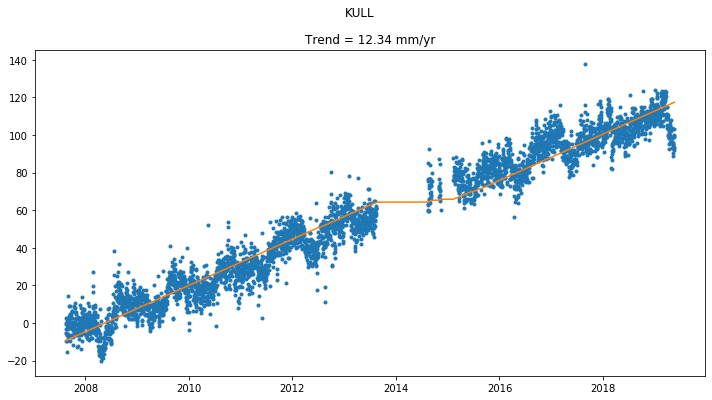

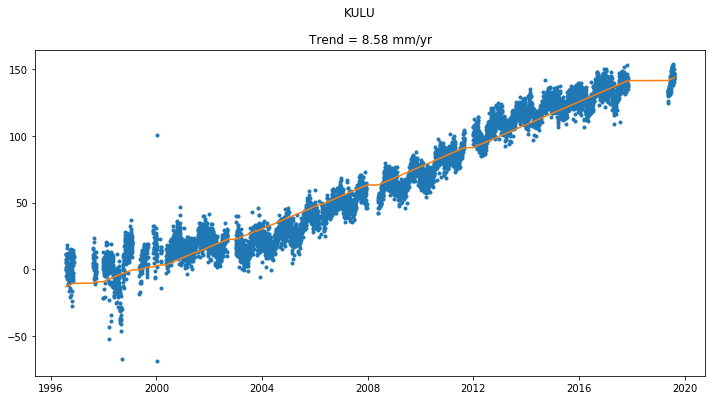

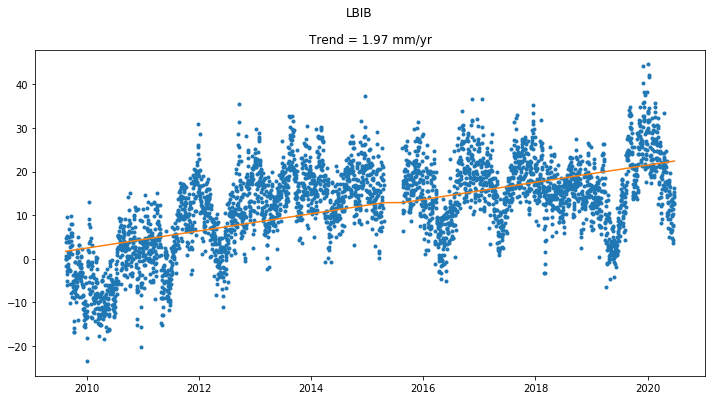

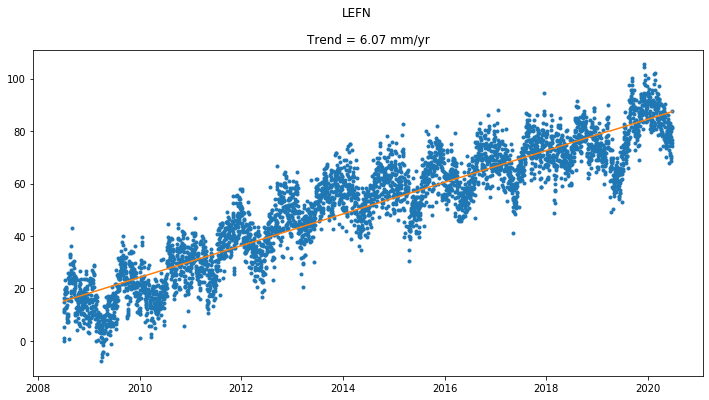

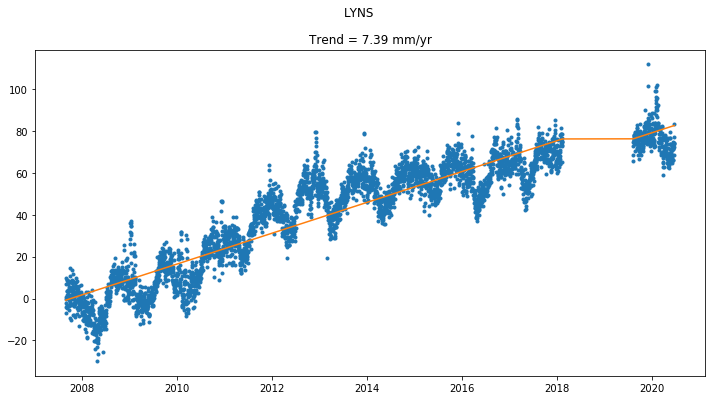

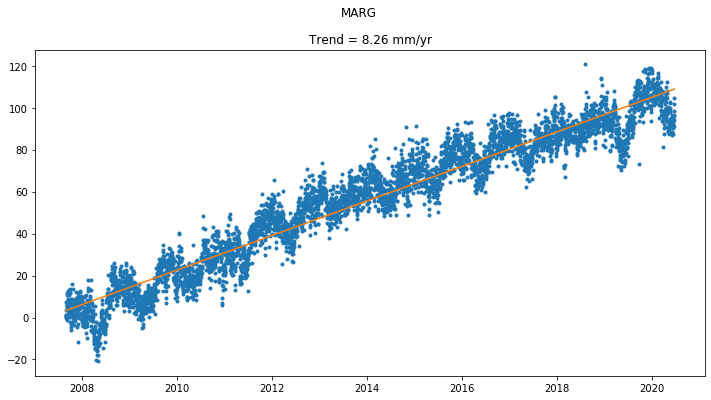

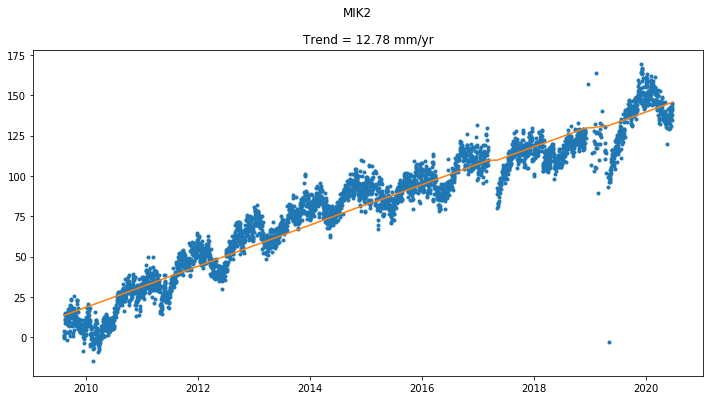

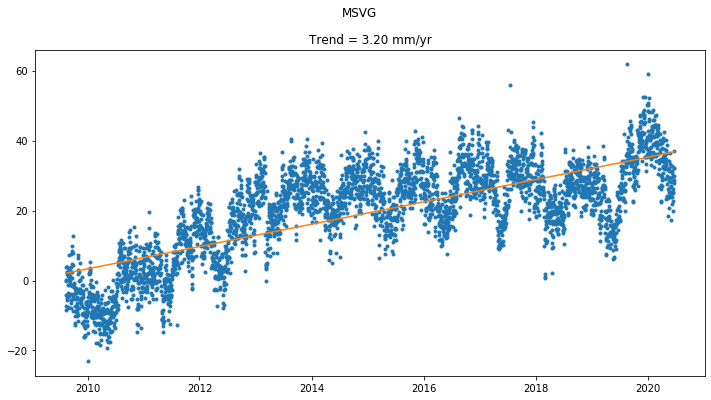

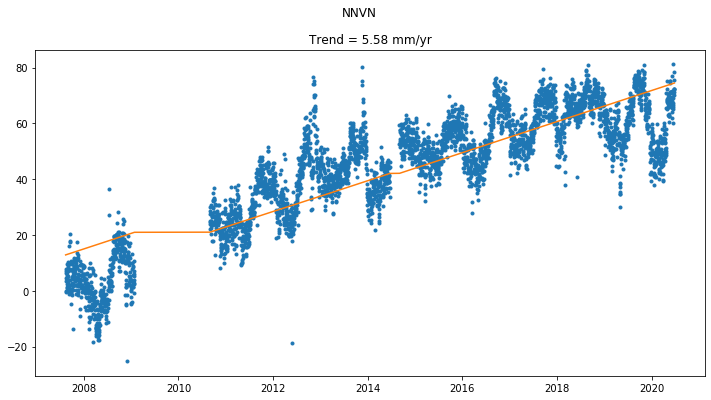

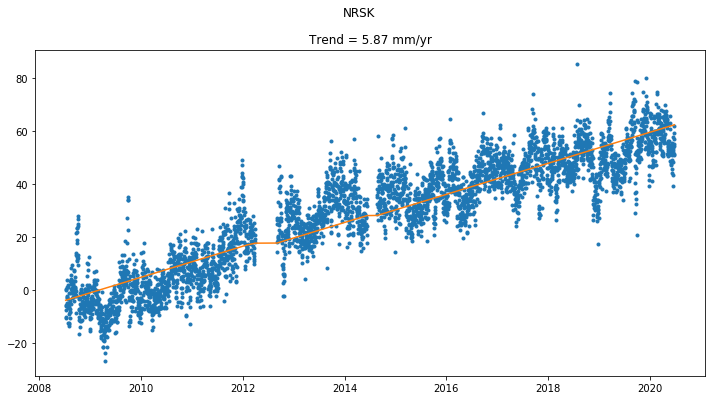

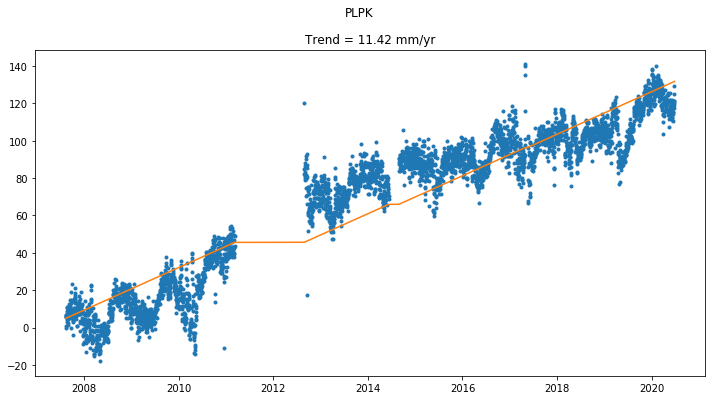

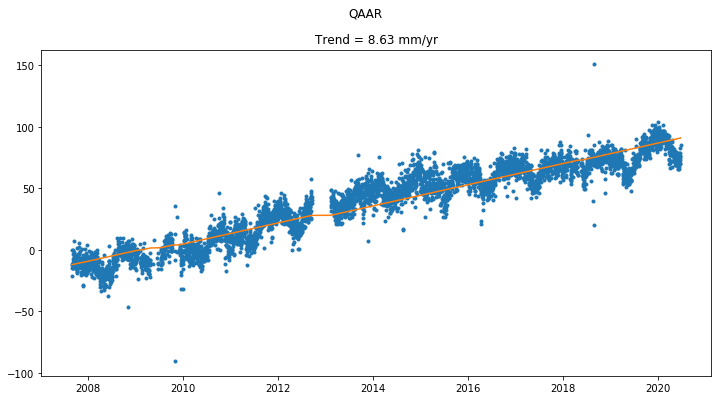

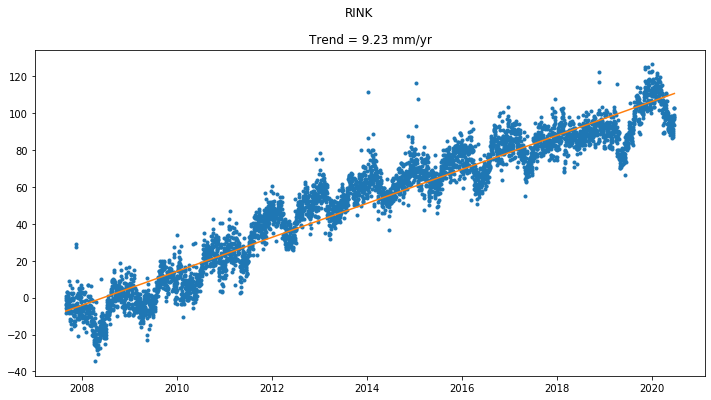

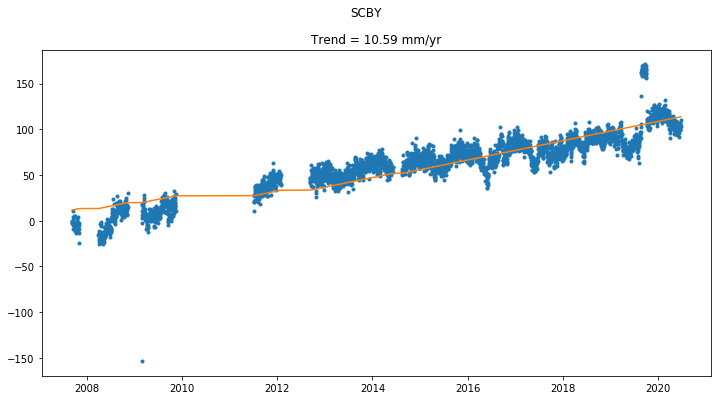

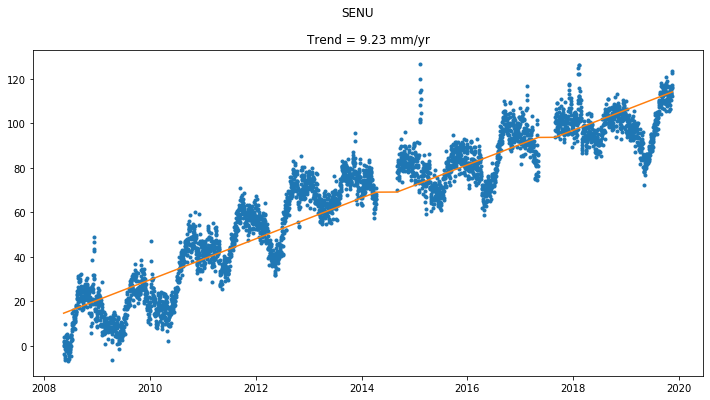

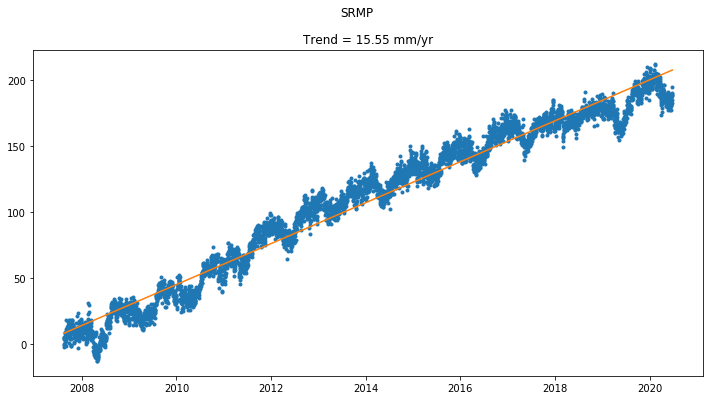

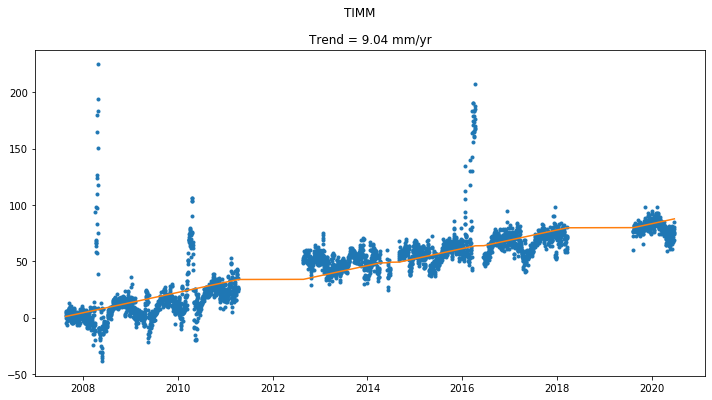

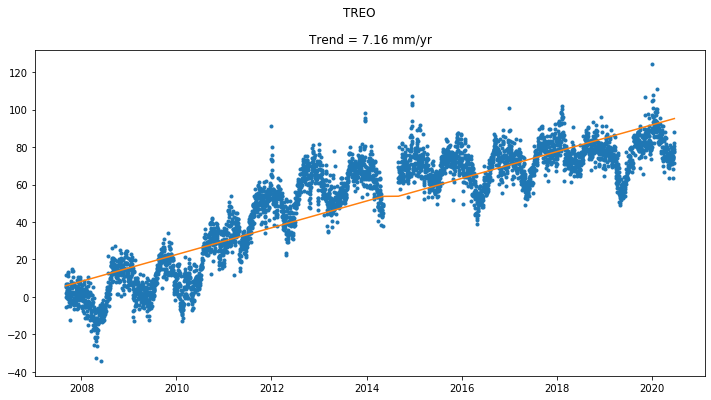

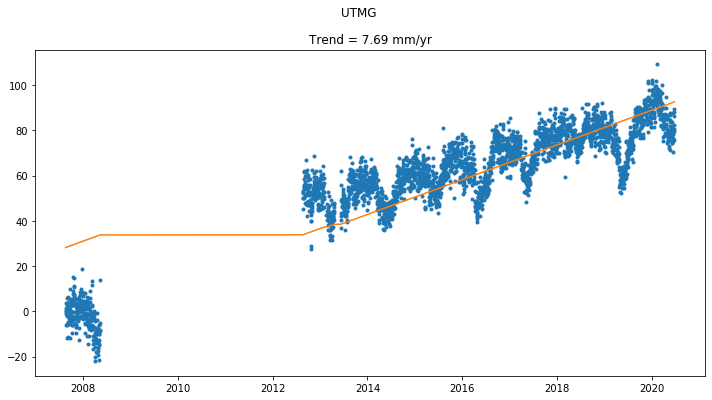

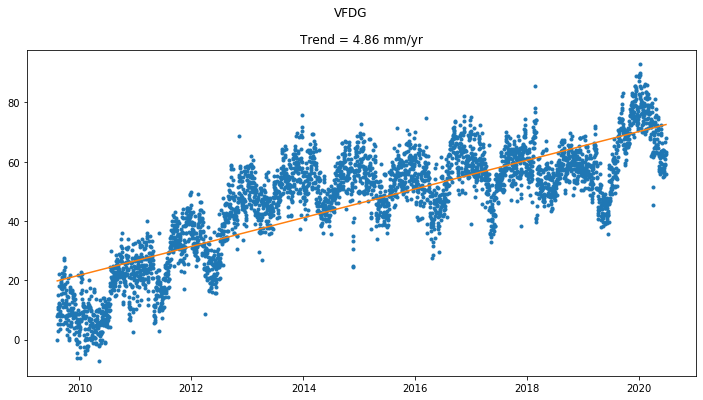

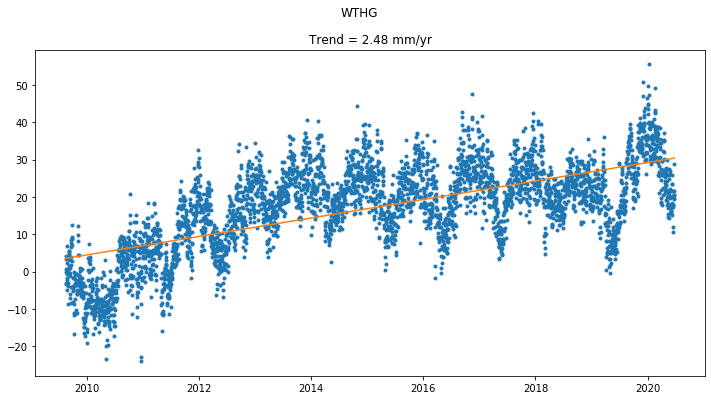

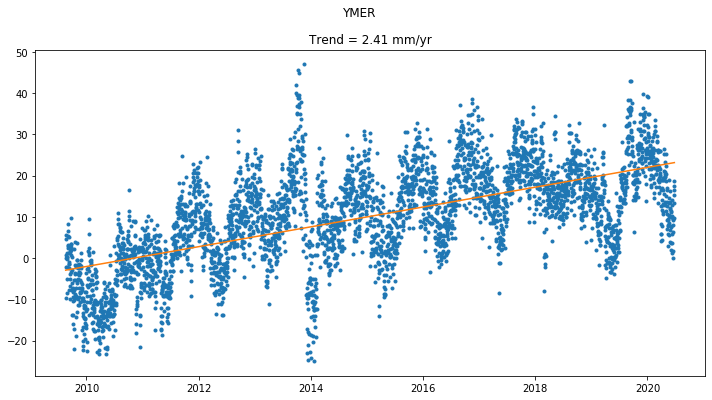

In [8]:
UNAVCO_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_nam14_UNAVCO(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    UNAVCO_trend_array[f] = convert_trend_toyearly(df, res)
    
    
    # Save site name
    site_name_array.append(filepath[-18:-14])
    
    print(f"Trend = {UNAVCO_trend_array[f] * 1:.2f} mm/yr")
#     print(res.summary())
   # np.savetxt('GPS_trend.csv', {sonel_trend_array[f] * 365:.2f}, delimiter=',')
    # Make Plot
    test_plot_OLS(df, res, filepath[-18:-14], 'Vertical', UNAVCO_trend_array[f])

In [9]:
from tidegauge_functions import get_UNAVCO_headerinfo

UNAVCO_SiteID_array = []
UNAVCO_Lat_array = np.full(np.shape(filenames)[0], np.nan)
UNAVCO_Lon_array = np.full(np.shape(filenames)[0], np.nan)
UNAVCO_Height_array = np.full(np.shape(filenames)[0], np.nan)


for f, filepath in enumerate(filenames):
    a,b,c,d = get_UNAVCO_headerinfo(filenames[f])
    print('\n',a,b,c,d)
    temp_name, UNAVCO_Lat_array[f], UNAVCO_Lon_array[f], UNAVCO_Height_array[f] = \
        get_UNAVCO_headerinfo(filenames[f])
    #temp_name, temp_lat, temp_lon, temp_height = get_UNAVCO_headerinfo(filenames[f])



4-character ID, ASKY


 ASKY 75.7261286070 -58.257348695 687.36811
4-character ID, ASKY

4-character ID, BLAS


 BLAS 79.5386074267 -22.9747195642 484.05114
4-character ID, BLAS

4-character ID, DGJG


 DGJG 71.7865328248 -29.8502044134 1494.15755
4-character ID, DGJG

4-character ID, DKSG


 DKSG 76.3516206291 -61.6776685191 609.69591
4-character ID, DKSG

4-character ID, GMMA


 GMMA 77.8094246908 -19.6521155161 521.82652
4-character ID, GMMA

4-character ID, GROK


 GROK 78.4426981683 -22.9037619947 1045.90985
4-character ID, GROK

4-character ID, HEL2


 HEL2 66.4011568623 -38.2157045418 424.85943
4-character ID, HEL2

4-character ID, HJOR


 HJOR 63.4182094736 -41.1478677134 762.68260
4-character ID, HJOR

4-character ID, HMBG


 HMBG 73.6759811957 -28.1290688195 1322.92340
4-character ID, HMBG

4-character ID, HRDG


 HRDG 81.8798314505 -44.5173703227 718.38698
4-character ID, HRDG

4-character ID, JGBL


 JGBL 82.2087576709 -31.0041999392 753.24715
4-character ID, JGBL

4-charac

In [10]:
#Write CSV trend array
columns = ['SITE', 'LAT', 'LON', 'Height', 'TREND_Vertical']
out_array = np.array([site_name_array, UNAVCO_Lat_array, UNAVCO_Lon_array, UNAVCO_Height_array, UNAVCO_trend_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_UNAVCO.csv')  # , na_rep=" ")